In [7]:
import pandas as pd
df = pd.read_csv(r"C:\Users\rajan\Downloads\churndataset.csv\Churn_Modelling.csv.csv")

In [9]:
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [11]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [13]:
df = pd.get_dummies(df, columns = ['Geography', 'Gender'],
                    drop_first= True)

In [19]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  bool   
 10  Geography_Spain    10000 non-null  bool   
 11  Gender_Male        10000 non-null  bool   
dtypes: bool(3), float64(2), int64(7)
memory usage: 732.6 KB
None


In [34]:
print(df.isnull().sum())

df.fill(method= 'ffill', inplace= True)
df.drop(columns=['customer ID'],
inplace = True)

CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_Germany    0
Geography_Spain      0
Gender_Male          0
dtype: int64


AttributeError: 'DataFrame' object has no attribute 'fill'

In [38]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [42]:
from sklearn.model_selection import train_test_split

X = df.drop('Exited', axis=1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

ModuleNotFoundError: No module named 'xgboost'

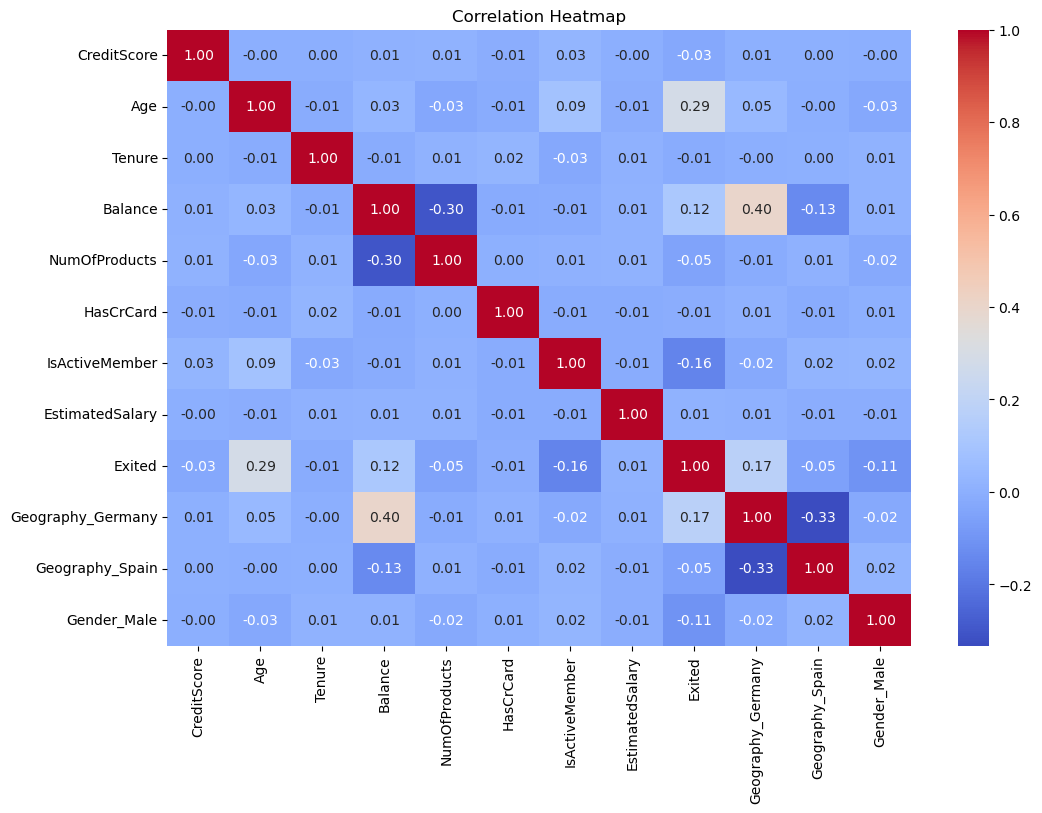

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

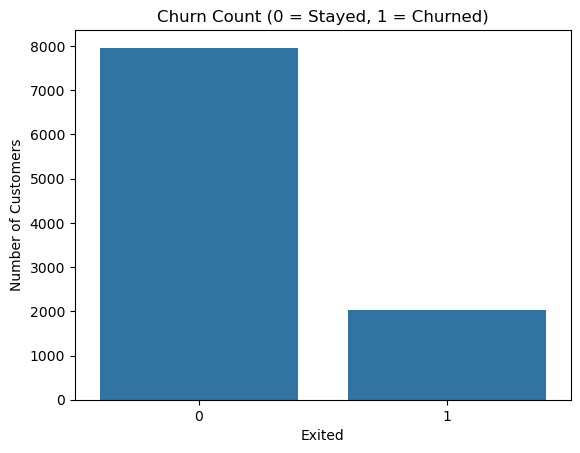

In [48]:
sns.countplot(x='Exited', data=df)
plt.title('Churn Count (0 = Stayed, 1 = Churned)')
plt.xlabel('Exited')
plt.ylabel('Number of Customers')
plt.show()

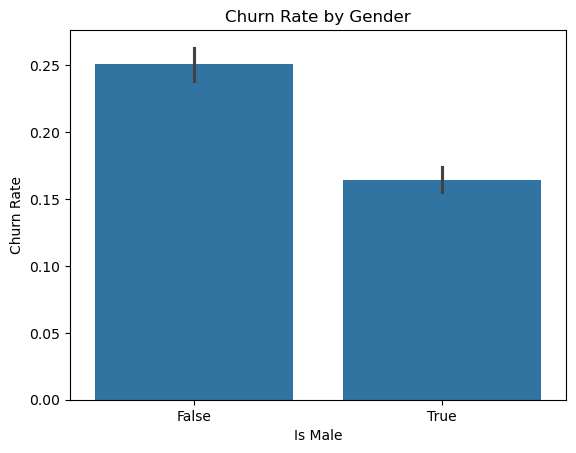

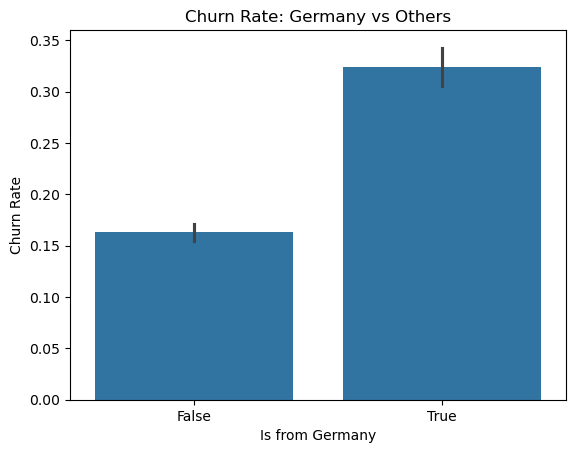

In [50]:
sns.barplot(x='Gender_Male', y='Exited', data=df)
plt.title('Churn Rate by Gender')
plt.xlabel('Is Male')
plt.ylabel('Churn Rate')
plt.show()

# Example for Geography (if encoded like 'Geography_Germany', etc.)
sns.barplot(x='Geography_Germany', y='Exited', data=df)
plt.title('Churn Rate: Germany vs Others')
plt.xlabel('Is from Germany')
plt.ylabel('Churn Rate')
plt.show()

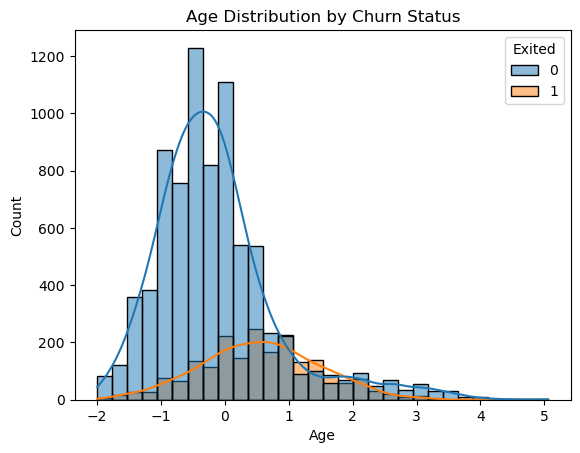

In [52]:
sns.histplot(data=df, x='Age', hue='Exited', kde=True, bins=30)
plt.title('Age Distribution by Churn Status')
plt.show()

In [56]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [58]:
importances = rf_model.feature_importances_

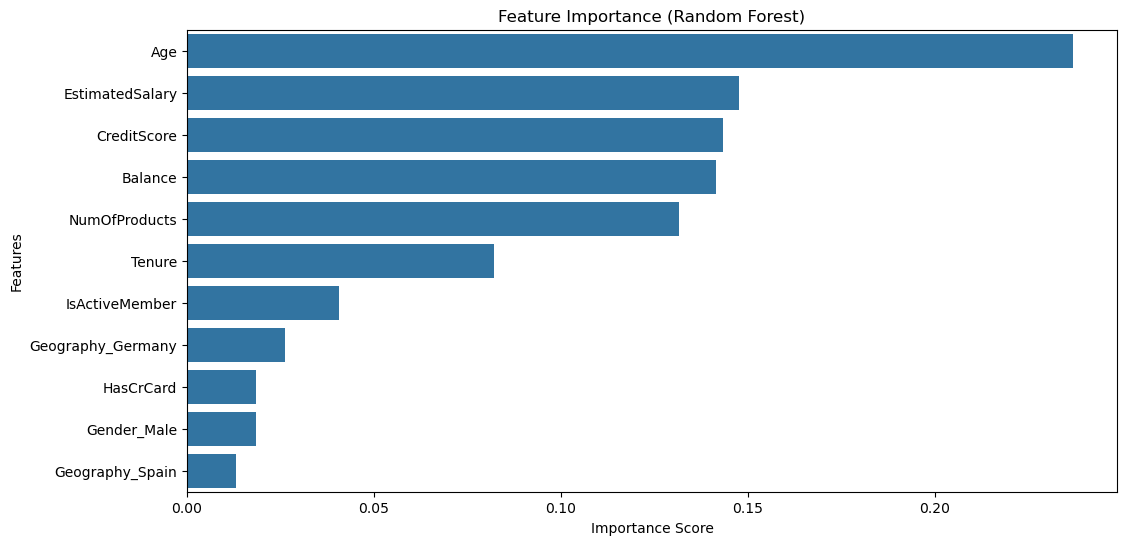

In [60]:
import numpy as np

importances = rf_model.feature_importances_
features = X.columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [64]:
df.info()

print("Shape:", df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  float64
 1   Age                10000 non-null  float64
 2   Tenure             10000 non-null  float64
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  float64
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  bool   
 10  Geography_Spain    10000 non-null  bool   
 11  Gender_Male        10000 non-null  bool   
dtypes: bool(3), float64(6), int64(3)
memory usage: 732.6 KB
Shape: (10000, 12)


In [66]:
print(df.describe())

print(df.describe(include='all'))


        CreditScore           Age        Tenure       Balance  NumOfProducts  \
count  1.000000e+04  1.000000e+04  1.000000e+04  1.000000e+04   1.000000e+04   
mean  -4.824585e-16  2.318146e-16 -1.078249e-16 -6.252776e-17   1.634248e-17   
std    1.000050e+00  1.000050e+00  1.000050e+00  1.000050e+00   1.000050e+00   
min   -3.109504e+00 -1.994969e+00 -1.733315e+00 -1.225848e+00  -9.115835e-01   
25%   -6.883586e-01 -6.600185e-01 -6.959818e-01 -1.225848e+00  -9.115835e-01   
50%    1.522218e-02 -1.832505e-01 -4.425957e-03  3.319639e-01  -9.115835e-01   
75%    6.981094e-01  4.842246e-01  6.871299e-01  8.199205e-01   8.077366e-01   
max    2.063884e+00  5.061197e+00  1.724464e+00  2.795323e+00   4.246377e+00   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  
count  10000.00000    10000.000000     1.000000e+04  10000.000000  
mean       0.70550        0.515100    -2.877698e-17      0.203700  
std        0.45584        0.499797     1.000050e+00      0.402769  
min    